## Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.
Instructions

    1. Load the dataset and explore the variables.
    2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
    3. Extract the target variable.
    4. Extract the independent variables and scale them.
    5. Build the logistic regression model.
    6. Evaluate the model.
    7. Even a simple model will give us more than 70% accuracy. Why?
    8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
    9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
ls

'Optional Lab - Imbalanced data.ipynb'   customer_churn.csv   iris_dirty.csv
'Predict the flower class.ipynb'         iris.jpg             readme.md


In [5]:
df = pd.read_csv('customer_churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Extract the target variable

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [13]:
############################################
### good way to pass to numericals #########
############################################

y = (df.Churn == 'Yes').astype(int)
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [14]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### Extract the independent variables and scale them

In [15]:
X = df[["tenure", "SeniorCitizen", "MonthlyCharges"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [16]:
# rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_standardized = transformer.transform(X)
print(X_standardized.shape)

(7043, 3)


#### Building the logistic regression model, with imbalanced target

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [29]:
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,multi_class='ovr').fit(X_train, y_train)

In [30]:
predictions = clf.predict(X_test)

In [31]:
accuracy_score(y_test, predictions)

0.7888573456352023

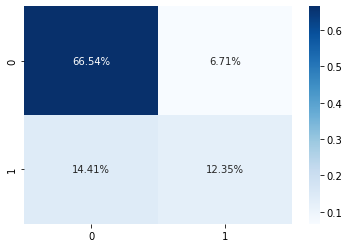

In [49]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

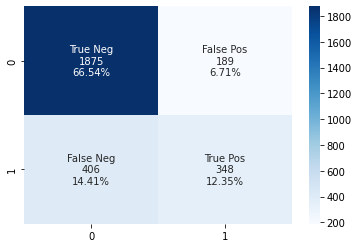

In [50]:
group_names = ["True Neg","False Pos",'False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [33]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.84496124e-04,
       4.84496124e-04, 1.45348837e-03, 1.45348837e-03, 1.93798450e-03,
       1.93798450e-03, 2.42248062e-03, 2.42248062e-03, 2.90697674e-03,
       2.90697674e-03, 3.39147287e-03, 3.39147287e-03, 3.87596899e-03,
       4.36046512e-03, 4.36046512e-03, 4.84496124e-03, 4.84496124e-03,
       4.84496124e-03, 4.84496124e-03, 4.84496124e-03, 4.84496124e-03,
       5.32945736e-03, 5.32945736e-03, 5.81395349e-03, 5.81395349e-03,
       6.78294574e-03, 6.78294574e-03, 7.26744186e-03, 7.75193798e-03,
       7.75193798e-03, 8.23643411e-03, 8.23643411e-03, 8.72093023e-03,
       8.72093023e-03, 9.20542636e-03, 9.20542636e-03, 9.68992248e-03,
       9.68992248e-03, 1.01744186e-02, 1.01744186e-02, 1.06589147e-02,
       1.06589147e-02, 1.06589147e-02, 1.06589147e-02, 1.11434109e-02,
       1.11434109e-02, 1.16279070e-02, 1.16279070e-02, 1.21124031e-02,
       1.21124031e-02, 1.25968992e-02, 1.25968992e-02, 1.30813953e-02,
      

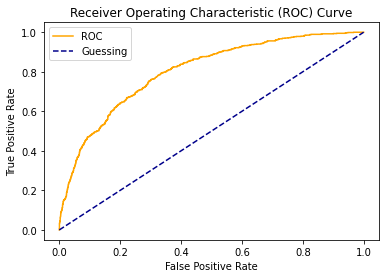

In [34]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2064
           1       0.65      0.46      0.54       754

    accuracy                           0.79      2818
   macro avg       0.74      0.68      0.70      2818
weighted avg       0.78      0.79      0.78      2818



In [56]:
<img src="../images/1.png" alt="Drawing" width="500"/>

SyntaxError: invalid syntax (2448391867.py, line 1)

In [ ]:
from imblearn.over_sampling import SMOTE
